In [1]:
import torch
from PIL import Image
import data.imgs as img_data
import os.path as osp
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np
from osgeo import gdal, ogr # https://opensourceoptions.com/blog/how-to-install-gdal-for-python-with-pip-on-windows/

In [2]:
train_data_path = osp.join(osp.dirname(img_data.__file__), "train_features")
train_label_path = osp.join(osp.dirname(img_data.__file__), "train_agbm")

In [3]:
def get_data_from_path(path):
    img_path = osp.join(train_data_path, path)
    dataset = gdal.Open(img_path)
    data = dataset.ReadAsArray()
    return data

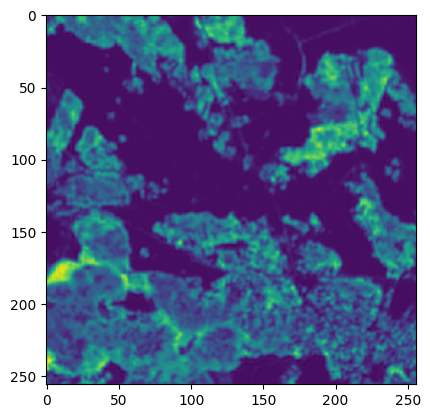

In [4]:
path_temp = r"C:\Users\Team Epoch A\Documents\Epoch III\forestbiomass\data\imgs\test_agbm\00a28320_agbm.tif"
d = get_data_from_path(path_temp)
plt.imshow(d)

(11, 256, 256)


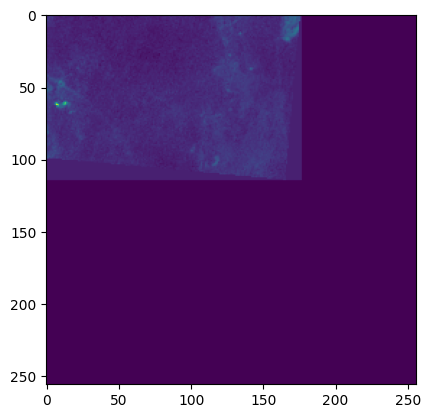

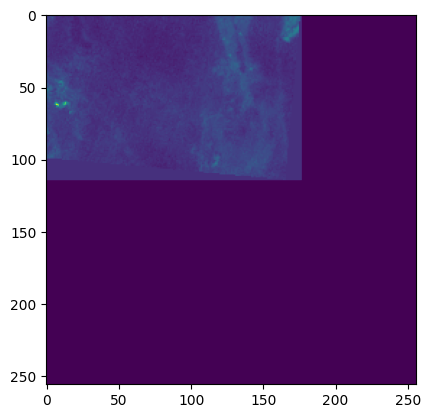

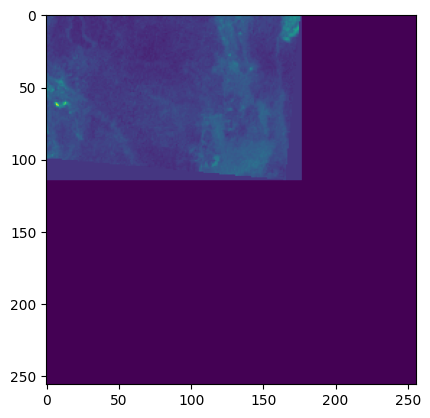

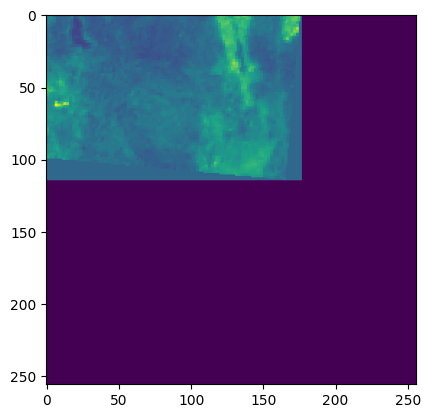

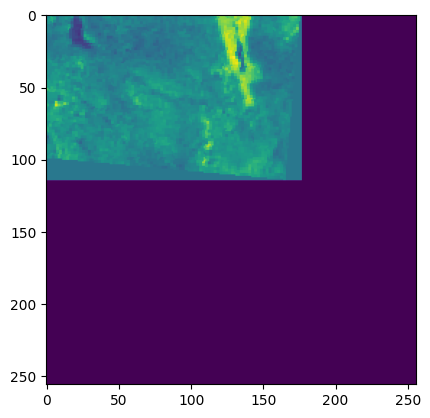

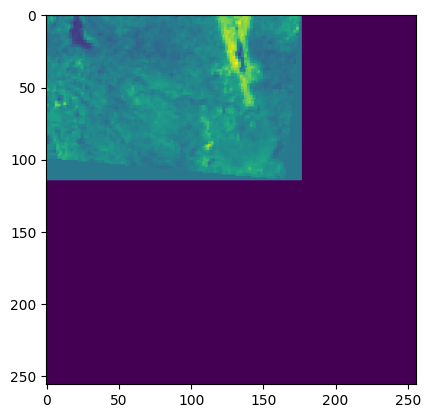

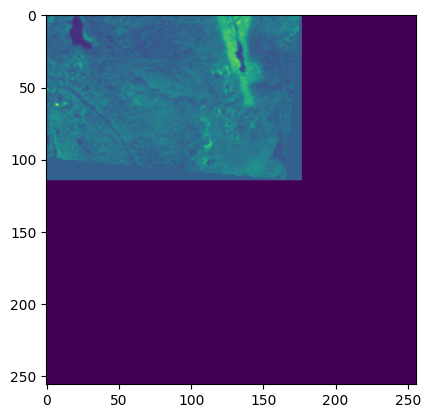

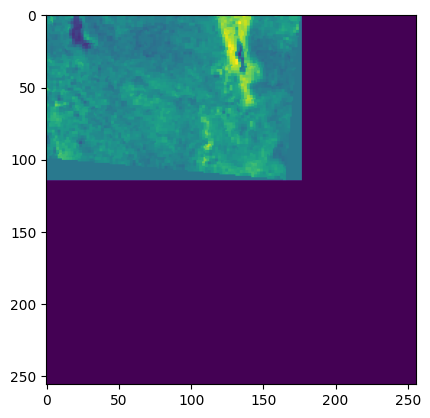

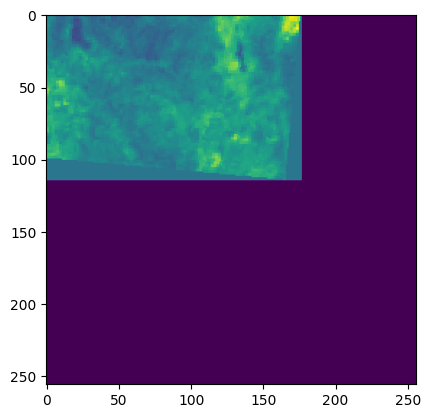

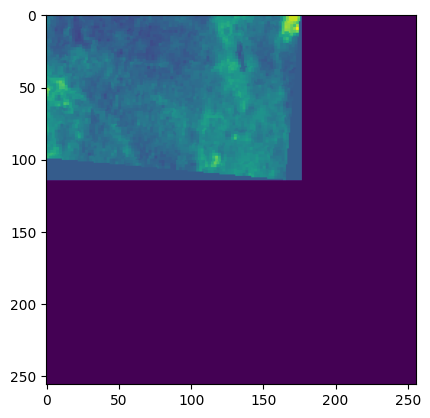

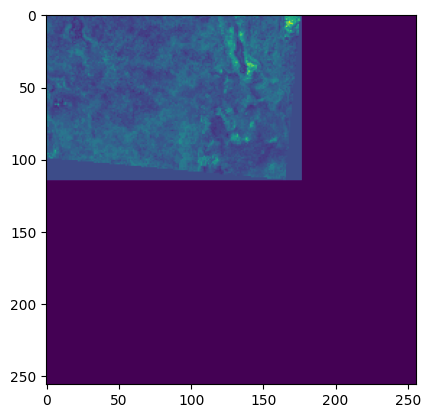

In [5]:

all_imgs = get_data_from_path("3f56d3a1_S2_02.tif") # 0a3d8f03_S2_00.tif
print(all_imgs.shape)
for d in all_imgs:
    plt.imshow(d)
    plt.show()

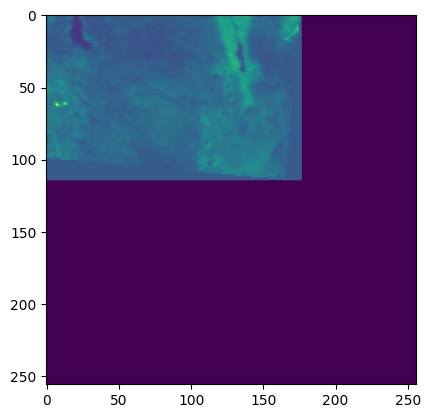

In [6]:
plt.imshow(np.average(all_imgs, axis=0))

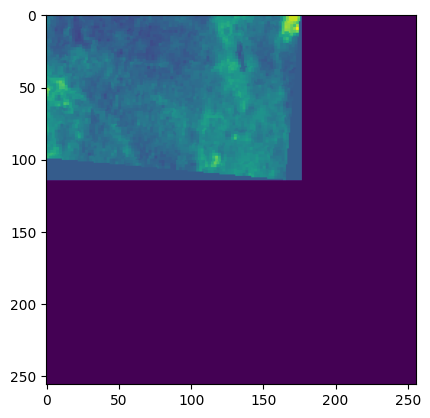

In [7]:
import torch
type(all_imgs[0])
test_image = all_imgs[9]
imshow(test_image)

In [157]:
tensor_image = torch.tensor(np.asarray(test_image, dtype=np.float32))
tensor_image

tensor([[276., 266., 266.,  ...,   0.,   0.,   0.],
        [252., 258., 258.,  ...,   0.,   0.,   0.],
        [252., 258., 258.,  ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.]])

In [158]:
# adapted_image = tensor_image
# adapted_image[adapted_image==0] = 10000
# adapted_image

In [189]:
import torch
from torch.nn import functional as F

def create_mask(image_tensor, radius):
    assert image_tensor.shape == (256, 256), "Input image must be of shape (256, 256)"
    # add singleton dimension
    image_tensor = image_tensor.unsqueeze(0)
    # Create convolution mask
    convolution_mask = F.avg_pool2d(image_tensor, kernel_size=radius*2+1, stride=1, padding=radius)
    # remove singleton dimension
    convolution_mask = convolution_mask.squeeze(0)
    # Create comparison mask
    comparison_mask = torch.where(image_tensor == convolution_mask, torch.tensor(0.), torch.tensor(1.))
    return comparison_mask[0]

In [190]:
tensor_image.shape

torch.Size([256, 256])

tensor(0.3314)

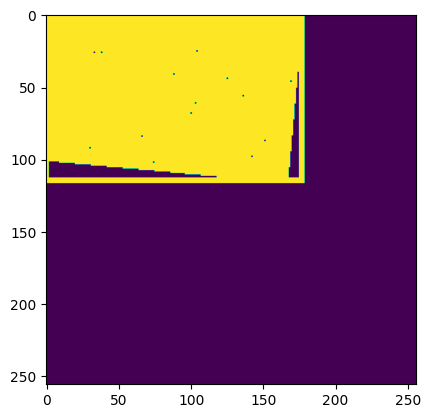

In [193]:
imshow(create_mask(tensor_image, 2))
torch.mean(create_mask(tensor_image, 5))

In [188]:
imshow(create_mask(tensor_image, 1, 2))

TypeError: create_mask() takes 2 positional arguments but 3 were given

In [132]:
imshow(create_mask(tensor_image, 10).detach().numpy())

RuntimeError: shape '[256, 256]' is invalid for input of size 66049

In [88]:
torch.mean(create_mask(tensor_image))

tensor(0.8810, grad_fn=<MeanBackward0>)

In [18]:
test_image = torch.from_numpy(all_imgs[0], dtype=np.float32)

TypeError: torch._VariableFunctionsClass.from_numpy() takes no keyword arguments

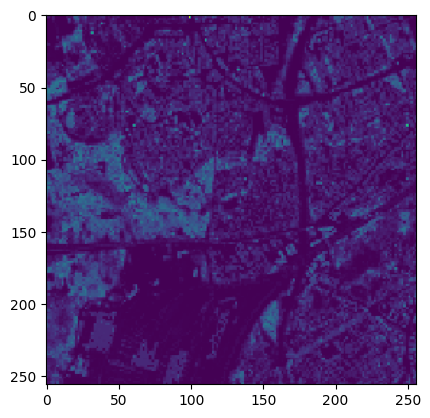

In [15]:
im = Image.open( osp.join(train_label_path, "8bea695a_agbm.tif") )
imshow(np.asarray(im))

In [4]:
def get_data_from_path(path):
    # img_path = osp.join(train_data_path, path)
    dataset = gdal.Open(path)
    data = dataset.ReadAsArray()
    return data

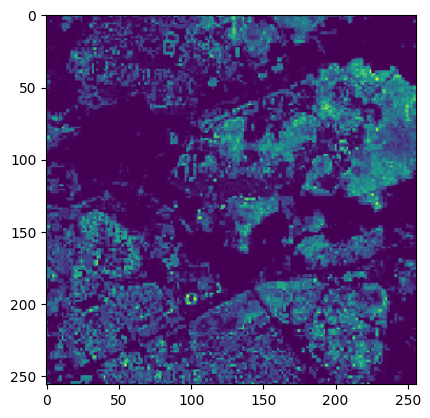

In [5]:
path_temp = r"C:\Users\Team Epoch A\Documents\Epoch III\forestbiomass\data\imgs\train_agbm\000aa810_agbm.tif"
ground = get_data_from_path(path_temp)
plt.imshow(ground)

In [6]:
path_temp = r"C:\Users\Team Epoch A\Documents\Epoch III\forestbiomass\data\imgs\swinres_agbm\000aa810_agbm.tif"
np.set_printoptions(threshold=np.inf)
swinres_pred = get_data_from_path(path_temp)
plt.imshow(swinres_pred)

AttributeError: 'NoneType' object has no attribute 'ReadAsArray'

In [7]:
plt.imshow(swinres_pred-ground)

NameError: name 'swinres_pred' is not defined

In [8]:
for i in range(256):
    for j in range(256):
        if ground[i][j] < 0:
            print(ground[i][j], swinres_pred[i][j])

In [9]:
from tqdm import tqdm
import data
import csv

path_patch_names = osp.join(osp.dirname(data.__file__), "patch_names")

with open(path_patch_names, newline='') as f:
    reader = csv.reader(f)
    patch_name_data = list(reader)
patch_names = patch_name_data[0]

for patch_name in patch_names:
    path_temp = rf"C:\Users\Team Epoch A\Documents\Epoch III\forestbiomass\data\imgs\train_agbm\{patch_name}_agbm.tif"
    smallest = min(get_data_from_path(path_temp).flatten())
    if smallest < 0:
        print(smallest)

KeyboardInterrupt: 

In [35]:
from models.utils.loss_functions import rmse_loss

def get_data_from_path(path):
    # img_path = osp.join(train_data_path, path)
    dataset = gdal.Open(path)
    data = dataset.ReadAsArray()
    return data


path_patch_names = osp.join(osp.dirname(data.__file__), "patch_names")

with open(path_patch_names, newline='') as f:
    reader = csv.reader(f)
    patch_name_data = list(reader)
patch_names = patch_name_data[0][0:100]

for patch_name in patch_names:
    path_label = rf"C:\Users\Team Epoch A\Documents\Epoch III\forestbiomass\data\imgs\train_agbm\{patch_name}_agbm.tif"
    label = torch.tensor(get_data_from_path(path_label))

    path_swinres = rf"C:\Users\Team Epoch A\Documents\Epoch III\forestbiomass\data\imgs\train_swinres_agbm\{patch_name}_agbm.tif"
    swinres = torch.tensor(get_data_from_path(path_swinres))

    path_swinefficient = rf"C:\Users\Team Epoch A\Documents\Epoch III\forestbiomass\data\imgs\train_swinefficientnet_agbm\{patch_name}_agbm.tif"
    swinefficient = torch.tensor(get_data_from_path(path_swinefficient))

    print(np.round(rmse_loss(swinres, label).item(), 0), np.round(rmse_loss(swinefficient, label).item(), 0), np.round(rmse_loss(torch.mean(torch.stack([swinres, swinefficient]), dim=0), label).item(), 0))
    # print(torch.mean(torch.stack([swinres, swinefficient]), dim=0).shape)

    # Conlusion: both simply taking average and maximum of swinres and swinefficient is suboptimal compared to just swinefficient

6.0 5.0 5.0
78.0 54.0 61.0
29.0 20.0 23.0
31.0 25.0 26.0
49.0 44.0 45.0
37.0 31.0 32.0
17.0 15.0 16.0
59.0 23.0 37.0
26.0 23.0 24.0
52.0 34.0 39.0
78.0 72.0 74.0
38.0 32.0 33.0
16.0 15.0 15.0
20.0 16.0 17.0
39.0 33.0 34.0
35.0 28.0 30.0
25.0 20.0 21.0
24.0 19.0 20.0
33.0 29.0 30.0
53.0 34.0 40.0
41.0 29.0 33.0
46.0 34.0 37.0
28.0 18.0 21.0
20.0 17.0 18.0
47.0 37.0 40.0
31.0 15.0 20.0
38.0 35.0 35.0
17.0 11.0 13.0
36.0 20.0 25.0
29.0 23.0 25.0
52.0 41.0 44.0
40.0 30.0 32.0
53.0 44.0 46.0
40.0 32.0 34.0
24.0 25.0 22.0
39.0 35.0 36.0
34.0 27.0 29.0
25.0 23.0 24.0
41.0 33.0 35.0
9.0 6.0 7.0
54.0 46.0 48.0
47.0 43.0 44.0
34.0 30.0 31.0
25.0 20.0 21.0
24.0 18.0 20.0
28.0 22.0 24.0
34.0 28.0 29.0
20.0 15.0 16.0
21.0 18.0 19.0
37.0 25.0 28.0
51.0 41.0 44.0
28.0 24.0 25.0
47.0 40.0 42.0
61.0 49.0 52.0
47.0 33.0 37.0
43.0 36.0 37.0
39.0 32.0 34.0
38.0 32.0 33.0
22.0 17.0 18.0
63.0 54.0 57.0
78.0 67.0 70.0
59.0 56.0 56.0
20.0 17.0 17.0
27.0 22.0 23.0
46.0 37.0 39.0
18.0 15.0 16.0
19.0 15.0 16.0
1